# Lab 2 Sample Code

In [1]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(x):
    """Sigmoid function.
    This function accepts any shape of np.ndarray object as input and perform sigmoid operation.
    """
    return 1 / (1 + np.exp(-x))


def der_sigmoid(y):
    """First derivative of Sigmoid function.
    The input to this function should be the value that output from sigmoid function.
    """
    return y * (1 - y)


class GenData:
    @staticmethod
    def _gen_linear(n=100):
        """Data generation (Linear)

        Args:
            n (int):    the number of data points generated in total.

        Returns:
            data (np.ndarray, np.float):    the generated data with shape (n, 2). Each row represents
                a data point in 2d space.
            labels (np.ndarray, np.int):    the labels that correspond to the data with shape (n, 1).
                Each row represents a corresponding label (0 or 1).
        """
        pos = np.array([(np.random.random(), np.random.random()) for i in range(n)])
        x, y = pos[:, 0], pos[:, 1]
        return pos, (x > y).astype(np.int64).reshape((-1, 1))

    @staticmethod
    def _gen_xor(n=100):
        """Data generation (XOR)

        Args:
            n (int):    the number of data points generated in total.

        Returns:
            data (np.ndarray, np.float):    the generated data with shape (n, 2). Each row represents
                a data point in 2d space.
            labels (np.ndarray, np.int):    the labels that correspond to the data with shape (n, 1).
                Each row represents a corresponding label (0 or 1).
        """
        data_x = np.linspace(0, 1, n // 2)

        inputs = []
        labels = []

        for x in data_x:
            inputs.append([x, x])
            labels.append(0)

            if x == 1 - x:
                continue

            inputs.append([x, 1 - x])
            labels.append(1)

        return np.array(inputs), np.array(labels).reshape((-1, 1))

    @staticmethod
    def _gen_chessboard(n=100):
        """Data generation (Chessboard)

        Args:
            n (int):    the number of data points generated in total.

        Returns:
            data (np.ndarray, np.float):    the generated data with shape (n, 2). Each row represents
                a data point in 2d space.
            labels (np.ndarray, np.int):    the labels that correspond to the data with shape (n, 1).
                Each row represents a corresponding label (0 or 1).
        """
        pos = np.array([(np.random.random(), np.random.random()) for i in range(n)])
        x, y = pos[:, 0], pos[:, 1]
        return pos, ((x < 0.25) ^ (x > 0.5) ^ (x > 0.75) ^ (y < 0.25) ^ (y > 0.5) ^ (y > 0.75)).astype(np.int64).reshape(
            (-1, 1)
        )

    @staticmethod
    def fetch_data(mode, n):
        """Data gather interface

        Args:
            mode (str): 'Linear' or 'XOR', indicate which generator is used.
            n (int):    the number of data points generated in total.
        """
        assert mode == "Linear" or mode == "XOR" or mode == "Chessboard"

        data_gen_func = {"Linear": GenData._gen_linear, "XOR": GenData._gen_xor, "Chessboard": GenData._gen_chessboard}[mode]

        return data_gen_func(n)


class SimpleNet:
    def __init__(self, num_step=6000, print_interval=100, learning_rate=0.01):  # don't change print_interval
        """A hand-crafted implementation of simple network.

        Args:
            num_step (optional):    the total number of training steps.
            print_interval (optional):  the number of steps between each reported number.
        """
        self.num_step = num_step
        self.print_interval = print_interval
        self.learning_rate = learning_rate

        # Model parameters initialization
        # hidden layer 1: 100 nodes
        # hidden layer 2: 50 nodes
        # hidden layer 3: 10 nodes
        # Please initiate your network parameters here.
        
        # Model parameters initialization
        self.input_size = 2
        self.hidden1_size = 100
        self.hidden2_size = 50
        self.hidden3_size = 10
        self.output_size = 1

        self.hidden1_weights = np.random.randn(self.input_size, 100)
        self.hidden1_biases = np.zeros((1, 100))
        
        self.hidden2_weights = np.random.randn(100, 50)
        self.hidden2_biases = np.zeros((1, 50))
        
        self.hidden3_weights = np.random.randn(50, 10)
        self.hidden3_biases = np.zeros((1, 10))
        
        self.output_weights = np.random.randn(10, 1)
        self.output_biases = np.zeros((1, 1))
        
    @staticmethod
    def plot_result(data, gt_y, pred_y):
        """Data visualization with ground truth and predicted data comparison. There are two plots
        for them and each of them use different colors to differentiate the data with different labels.

        Args:
            data:   the input data
            gt_y:   ground truth to the data
            pred_y: predicted results to the data
        """
        assert data.shape[0] == gt_y.shape[0] == pred_y.shape[0], f"{data.shape}, {gt_y.shape}, {pred_y.shape}"

        plt.figure(figsize=(11, 5))

        plt.subplot(121)
        plt.title("Ground Truth", fontsize=18)
        plt.scatter(data[:,0], data[:,1], c=gt_y[:,0], cmap=plt.cm.bwr)

        plt.subplot(122)
        plt.title("Prediction", fontsize=18)
        plt.scatter(data[:,0], data[:,1], c=pred_y[:,0], cmap=plt.cm.bwr)

        plt.show()

    def forward(self, inputs):
        """Implementation of the forward pass.
        It should accepts the inputs and passing them through the network and return results.
        """
        self.inputs = inputs
        self.hidden1 = sigmoid(np.dot(self.inputs, self.hidden1_weights) + self.hidden1_biases)
        self.hidden2 = sigmoid(np.dot(self.hidden1, self.hidden2_weights) + self.hidden2_biases)
        self.hidden3 = sigmoid(np.dot(self.hidden2, self.hidden3_weights) + self.hidden3_biases)
        self.output = sigmoid(np.dot(self.hidden3, self.output_weights) + self.output_biases)
        return self.output


    def backward(self):
        """Implementation of the backward pass.
        It should utilize the saved loss to compute gradients and update the network all the way to the front.
        """

        # Compute gradients for the output layer
        d_output = self.error * der_sigmoid(self.output)
        self.output_weights -= self.learning_rate * np.dot(self.hidden3.T, d_output)
        self.output_biases -= self.learning_rate * np.sum(d_output, axis=0, keepdims=True)

        d_hidden3 = np.dot(d_output, self.output_weights.T) * der_sigmoid(self.hidden3)
        self.hidden3_weights -= self.learning_rate * np.dot(self.hidden2.T, d_hidden3)
        self.hidden3_biases -= self.learning_rate * np.sum(d_hidden3, axis=0, keepdims=True)

        d_hidden2 = np.dot(d_hidden3, self.hidden3_weights.T) * der_sigmoid(self.hidden2)
        self.hidden2_weights -= self.learning_rate * np.dot(self.hidden1.T, d_hidden2)
        self.hidden2_biases -= self.learning_rate * np.sum(d_hidden2, axis=0, keepdims=True)

        d_hidden1 = np.dot(d_hidden2, self.hidden2_weights.T) * der_sigmoid(self.hidden1)
        self.hidden1_weights -= self.learning_rate * np.dot(self.inputs.T, d_hidden1)
        self.hidden1_biases -= self.learning_rate * np.sum(d_hidden1, axis=0, keepdims=True)

        
    def train(self, inputs, labels):
        """The training routine that runs and update the model.

        Args:
            inputs: the training (and testing) data used in the model.
            labels: the ground truth of correspond to input data.
        """
        # make sure that the amount of data and label is match
        assert inputs.shape[0] == labels.shape[0]

        n = inputs.shape[0]

        for epochs in range(self.num_step):
            for idx in range(n):
                # operation in each training step:
                #   1. forward passing
                #   2. compute loss
                #   3. propagate gradient backward to the front
                self.output = self.forward(inputs[idx : idx + 1, :])
                self.error = self.output - labels[idx : idx + 1, :]
                loss = 0.5 * np.square(self.output - labels[idx : idx + 1, :]) #MSE
                self.backward()

            if epochs % self.print_interval == 0:
                print("Epochs {}: ".format(epochs), end="")
                self.test(inputs, labels)

        print("Training finished")
        self.test(inputs, labels)

    def test(self, inputs, labels):
        """The testing routine that run forward pass and report the accuracy.

        Args:
            inputs: the testing data. One or several data samples are both okay.
                The shape is expected to be [BatchSize, 2].
            labels: the ground truth correspond to the inputs.
        """
        n = inputs.shape[0]

        error = 0.0
        for idx in range(n):
            result = self.forward(inputs[idx : idx + 1, :])
            error += abs(result - labels[idx : idx + 1, :])

        error /= n

        """ Print or plot your results in your preferred forms"""
        print("accuracy: %.2f" % ((1 - error) * 100) + "%")

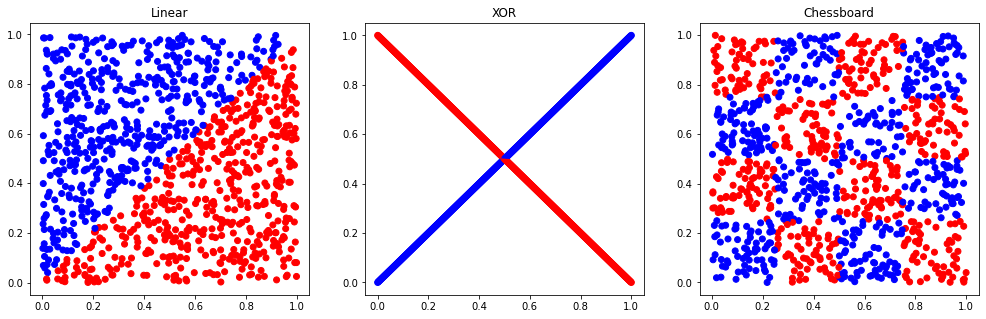

In [2]:
plt.figure(figsize=(17, 5))
for i, name in enumerate(['Linear', 'XOR', 'Chessboard']):
    data, label = GenData.fetch_data(name, 1000)
    plt.subplot(1,3,i+1)
    plt.scatter(data[:, 0], data[:, 1], c=label[:, 0], cmap=plt.cm.bwr)
    plt.title(name)

### Run "Linear"

Epochs 0: accuracy: 57.03%
Epochs 100: accuracy: 94.86%
Epochs 200: accuracy: 96.54%
Epochs 300: accuracy: 97.26%
Epochs 400: accuracy: 97.66%
Epochs 500: accuracy: 97.92%
Epochs 600: accuracy: 98.11%
Epochs 700: accuracy: 98.26%
Epochs 800: accuracy: 98.37%
Epochs 900: accuracy: 98.46%
Epochs 1000: accuracy: 98.54%
Epochs 1100: accuracy: 98.61%
Epochs 1200: accuracy: 98.67%
Epochs 1300: accuracy: 98.72%
Epochs 1400: accuracy: 98.76%
Epochs 1500: accuracy: 98.80%
Epochs 1600: accuracy: 98.83%
Epochs 1700: accuracy: 98.86%
Epochs 1800: accuracy: 98.89%
Epochs 1900: accuracy: 98.91%
Epochs 2000: accuracy: 98.93%
Epochs 2100: accuracy: 98.96%
Epochs 2200: accuracy: 98.99%
Epochs 2300: accuracy: 99.01%
Epochs 2400: accuracy: 99.04%
Epochs 2500: accuracy: 99.06%
Epochs 2600: accuracy: 99.08%
Epochs 2700: accuracy: 99.10%
Epochs 2800: accuracy: 99.11%
Epochs 2900: accuracy: 99.13%
Epochs 3000: accuracy: 99.14%
Epochs 3100: accuracy: 99.16%
Epochs 3200: accuracy: 99.17%
Epochs 3300: accuracy:

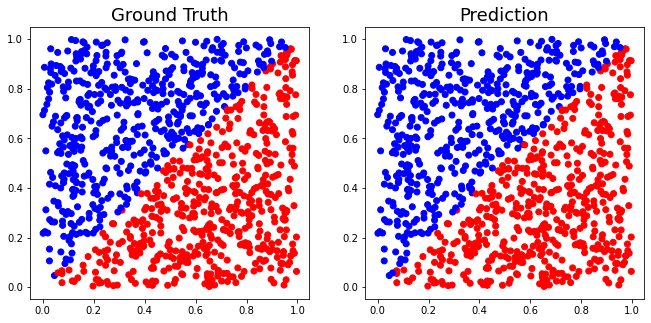

In [3]:
""" Customize your own code if needed """
data, label = GenData.fetch_data("Linear", 1000)

net = SimpleNet(5000)
net.train(data, label)

pred_result = np.round(net.forward(data))
SimpleNet.plot_result(data, label, pred_result)

### Run "XOR"

Epochs 0: accuracy: 50.17%
Epochs 100: accuracy: 82.21%
Epochs 200: accuracy: 88.49%
Epochs 300: accuracy: 90.94%
Epochs 400: accuracy: 92.34%
Epochs 500: accuracy: 93.26%
Epochs 600: accuracy: 93.93%
Epochs 700: accuracy: 94.44%
Epochs 800: accuracy: 94.84%
Epochs 900: accuracy: 95.17%
Epochs 1000: accuracy: 95.45%
Epochs 1100: accuracy: 95.68%
Epochs 1200: accuracy: 95.89%
Epochs 1300: accuracy: 96.06%
Epochs 1400: accuracy: 96.22%
Epochs 1500: accuracy: 96.36%
Epochs 1600: accuracy: 96.48%
Epochs 1700: accuracy: 96.59%
Epochs 1800: accuracy: 96.69%
Epochs 1900: accuracy: 96.78%
Epochs 2000: accuracy: 96.85%
Epochs 2100: accuracy: 96.91%
Epochs 2200: accuracy: 96.97%
Epochs 2300: accuracy: 97.01%
Epochs 2400: accuracy: 97.05%
Epochs 2500: accuracy: 97.09%
Epochs 2600: accuracy: 97.13%
Epochs 2700: accuracy: 97.17%
Epochs 2800: accuracy: 97.21%
Epochs 2900: accuracy: 97.25%
Epochs 3000: accuracy: 97.29%
Epochs 3100: accuracy: 97.33%
Epochs 3200: accuracy: 97.36%
Epochs 3300: accuracy:

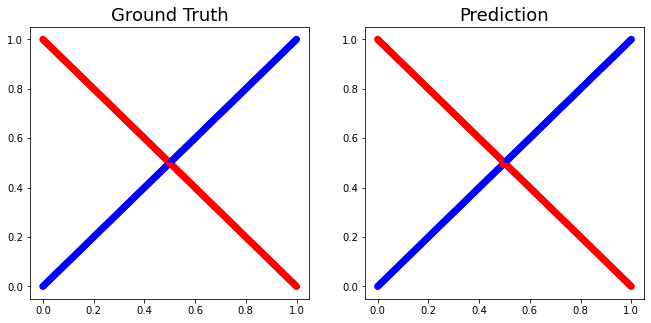

In [4]:
""" Customize your own code if needed """

data, label = GenData.fetch_data("XOR", 500)

net = SimpleNet(5000)
net.train(data, label)

pred_result = np.round(net.forward(data))
SimpleNet.plot_result(data, label, pred_result)

### Run "Chessboard"

Epochs 0: accuracy: 50.77%
Epochs 100: accuracy: 51.86%
Epochs 200: accuracy: 52.22%
Epochs 300: accuracy: 52.57%
Epochs 400: accuracy: 53.00%
Epochs 500: accuracy: 53.59%
Epochs 600: accuracy: 54.52%
Epochs 700: accuracy: 56.24%
Epochs 800: accuracy: 58.86%
Epochs 900: accuracy: 62.03%
Epochs 1000: accuracy: 65.18%
Epochs 1100: accuracy: 67.70%
Epochs 1200: accuracy: 70.17%
Epochs 1300: accuracy: 72.73%
Epochs 1400: accuracy: 76.02%
Epochs 1500: accuracy: 79.53%
Epochs 1600: accuracy: 81.96%
Epochs 1700: accuracy: 83.85%
Epochs 1800: accuracy: 85.69%
Epochs 1900: accuracy: 87.16%
Epochs 2000: accuracy: 88.39%
Epochs 2100: accuracy: 89.40%
Epochs 2200: accuracy: 90.23%
Epochs 2300: accuracy: 90.93%
Epochs 2400: accuracy: 91.52%
Epochs 2500: accuracy: 92.03%
Epochs 2600: accuracy: 92.47%
Epochs 2700: accuracy: 92.86%
Epochs 2800: accuracy: 93.20%
Epochs 2900: accuracy: 93.50%
Epochs 3000: accuracy: 93.78%
Epochs 3100: accuracy: 94.05%
Epochs 3200: accuracy: 94.29%
Epochs 3300: accuracy:

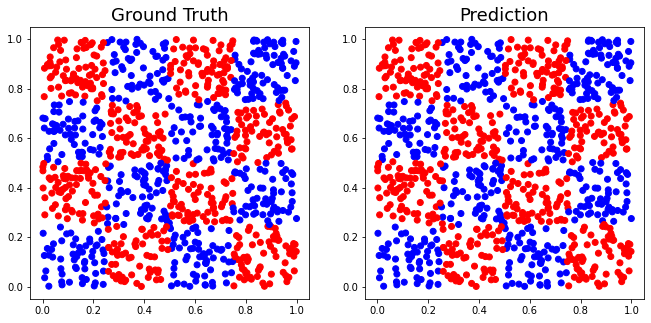

In [5]:
""" Customize your own code if needed """

data, label = GenData.fetch_data("Chessboard", 1000)

net = SimpleNet(5000)
net.train(data, label)

pred_result = np.round(net.forward(data))
SimpleNet.plot_result(data, label, pred_result)